# Programmbeispiel: Finite Differenzen (1D)

In diesem Beispiel lösen wir das Problem
$$
-u''(x) = f(x), x \in (a,b)
$$
mit Randwerten $u(a) = u_a, u(b) = u_b$. 


Damit wir konkret arbeiten können, wählen wir das Einheitsintervall $a=0, b=1$ und betrachten die rechte Seite $f(x) = \pi^2 \sin \pi x$. Hierfür ergibt sich die Lösung 
$$ u(x) = \sin \pi x
$$

In [1]:
xa = 0.0
xb = 1.0

ua= 0.0
ub= 0.0

NumCells = 8
NumPoints = NumCells +1

# Gitterweite
h = (xb-xa)/NumCells

# Koordinaten
x = linspace(xa, xb, NumPoints);

xa = 0
xb =  1
ua = 0
ub = 0
NumCells =  8
NumPoints =  9
h =  0.12500


In [2]:
f=inline("(pi*pi)*sin(pi*x)")
mysolution = inline("sin(pi*x)")

f = f(x) = (pi*pi)*sin(pi*x)
mysolution = f(x) = sin(pi*x)


## a) Schritt für Schritt zum LGS
Zunächst initialisieren wir für **innere Knoten** die Matrix und rechte Seite mit
$$
(-u_{i-1} + 2 u_i - u_{i+1}) = h^2 f_i
$$

In [3]:
%writefile init_matrix.m
function A=init_matrix(NumPoints)
A = zeros(NumPoints);
for i=1:NumPoints
    if (i>1) A(i,i-1) = -1; end
    A(i,i) = 2.0;
    if (i<NumPoints) A(i,i+1) = -1; end
end
endfunction

A = init_matrix(NumPoints)
b = (h*h)*f(x)(:)
u = zeros(NumPoints,1);

A =

   2  -1   0   0   0   0   0   0   0
  -1   2  -1   0   0   0   0   0   0
   0  -1   2  -1   0   0   0   0   0
   0   0  -1   2  -1   0   0   0   0
   0   0   0  -1   2  -1   0   0   0
   0   0   0   0  -1   2  -1   0   0
   0   0   0   0   0  -1   2  -1   0
   0   0   0   0   0   0  -1   2  -1
   0   0   0   0   0   0   0  -1   2

b =

   0.00000
   0.05901
   0.10904
   0.14247
   0.15421
   0.14247
   0.10904
   0.05901
   0.00000



An den Stellen, an denen **Dirichlet-Randwerte** vorliegen, wird in der Matrix eine Einheitszeile gesetzt und die rechte Seite angepasst:

In [4]:
function [A,b] = set_dirichlet(i, ui, A, b)
    b(i) = ui;
    A(i,:) = 0;
    A(i,i) = 1;
endfunction

In [5]:
[A,b] = set_dirichlet(1, ua, A, b);
[A,b] = set_dirichlet(NumPoints, ub, A, b)

A =

   1   0   0   0   0   0   0   0   0
  -1   2  -1   0   0   0   0   0   0
   0  -1   2  -1   0   0   0   0   0
   0   0  -1   2  -1   0   0   0   0
   0   0   0  -1   2  -1   0   0   0
   0   0   0   0  -1   2  -1   0   0
   0   0   0   0   0  -1   2  -1   0
   0   0   0   0   0   0  -1   2  -1
   0   0   0   0   0   0   0   0   1

b =

   0.00000
   0.05901
   0.10904
   0.14247
   0.15421
   0.14247
   0.10904
   0.05901
   0.00000



**Neumann-Randbedingungen** 
Gegeben sei die Neumann-Bedingung am linken Rand:
$$
\frac{\partial u}{\partial n} = -g
$$


In der Gleichung
$$
\frac{u_0-2u_1 + u_2}{h^2} = f_1 $$
eliminiert man den (Ghost-)Wert $u_0$ mittels

$$
\frac{u_2-u_0}{2h} = -g \Leftrightarrow  u_0 = u_2 + 2gh
$$
und erhält 
$$\frac{u_2- u_1}{h} =  \frac{h}{2}f_1 - g $$
bzw.
$$ (u_2- u_1) =  \frac{h^2}{2}f_1 - g h $$
Aus Symmetriegründen gilt die Updateformel auch am rechten Rand, wobei das Vorzeichen des Normalenvektors zu beachten ist.

In [6]:
function [A,b] = add_neumann(i, ghi, A, b)
    A(i,i) += -1.0;
    b(i) *=0.5;
    b(i) += ghi;
endfunction

% [A,b] = add_neumann(1, -h*1.0, A, b);

Die numerische Lösung kann nun über ein lineares Gleichungssystem bestimmt werden:

In [7]:
u = linsolve(A,b);

Wir wollen numerische und analytische Lösung gegenüberstellen:

sol =

 Columns 1 through 8:

   0.00000   0.38268   0.70711   0.92388   1.00000   0.92388   0.70711   0.38268

 Column 9:

   0.00000



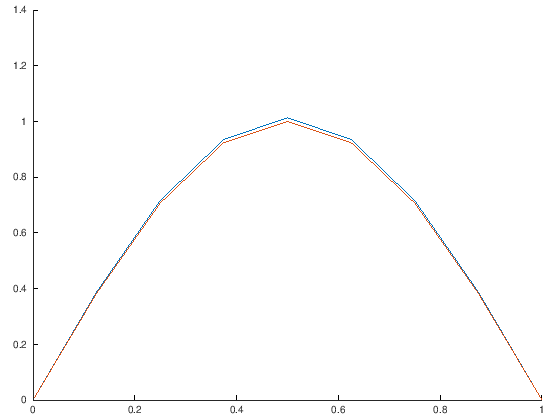

In [8]:
hold on
sol = mysolution(x)
plot(x, u)
plot(x, sol)

Den Fehler berechnen wir in den Punkten $x_i$:

In [9]:
err = u-sol
einf=norm(err, inf)

err =

 Columns 1 through 8:

   0.00000  -0.38268  -0.70711  -0.92388  -1.00000  -0.92388  -0.70711  -0.38268
   0.38764   0.00496  -0.31947  -0.53624  -0.61236  -0.53624  -0.31947   0.00496
   0.71626   0.33358   0.00916  -0.20762  -0.28374  -0.20762   0.00916   0.33358
   0.93584   0.55316   0.22874   0.01196  -0.06416   0.01196   0.22874   0.55316
   1.01295   0.63027   0.30584   0.08907   0.01295   0.08907   0.30584   0.63027
   0.93584   0.55316   0.22874   0.01196  -0.06416   0.01196   0.22874   0.55316
   0.71626   0.33358   0.00916  -0.20762  -0.28374  -0.20762   0.00916   0.33358
   0.38764   0.00496  -0.31947  -0.53624  -0.61236  -0.53624  -0.31947   0.00496
   0.00000  -0.38268  -0.70711  -0.92388  -1.00000  -0.92388  -0.70711  -0.38268

 Column 9:

  -0.00000
   0.38764
   0.71626
   0.93584
   1.01295
   0.93584
   0.71626
   0.38764
  -0.00000

einf =  5.0273


## b) Studie zur Diskretisierungsgenauigkeit

In [10]:
function [h, herr]=discretization_error(f, NumPoints, xLeft, uLeft, xRight, uRight, uref )

    # Gitterweite
    h = (xRight - xLeft)/(NumPoints-1);
    # Koordinaten
    x = linspace(xLeft, xRight, NumPoints);
    
    # Aufstellen des LGS
    A = init_matrix(NumPoints);
    h
    b = f(x)(:);
    b *= (h*h);
    u = zeros(NumPoints,1);
    
    [A,b] = set_dirichlet(1, uLeft, A, b);
    [A,b] = set_dirichlet(NumPoints, uRight, A, b);
    
    u = linsolve(A,b);
    
    sol = uref(x)(:);
    err = u -sol;
    herr=norm(err, inf);
    
endfunction


In [11]:
for k=1:8
    [hGrid(k), hErr(k)] = discretization_error(f, 2**k+1, xa, ua, xb, ub, mysolution);
endfor 

hGrid(:)
hErr(:)

h =  0.50000
h =  0.25000
h =  0.12500
h =  0.062500
h =  0.031250
h =  0.015625
h =  0.0078125
h =  0.0039062
ans =

   0.5000000
   0.2500000
   0.1250000
   0.0625000
   0.0312500
   0.0156250
   0.0078125
   0.0039062

ans =

   0.233700550
   0.053029288
   0.012950747
   0.003218964
   0.000803578
   0.000200822
   0.000050201
   0.000012550



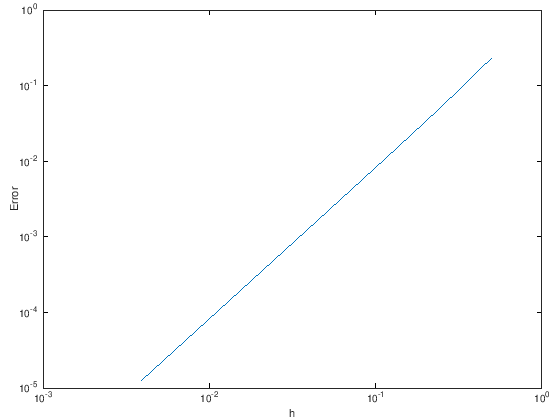

In [12]:

loglog(hGrid,hErr)
xlabel("h")
ylabel("Error")